In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv"
df = pd.read_csv(url)
df.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [3]:
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64

In [4]:
df.shape

(748, 5)

<AxesSubplot:>

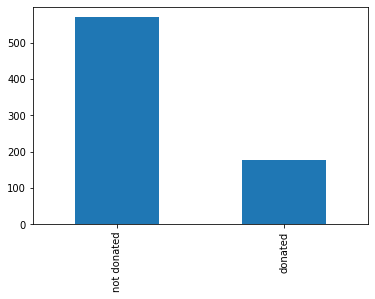

In [5]:
df.Class.value_counts().plot(kind='bar')

In [6]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [9]:
estimator = make_pipeline(StandardScaler(), DecisionTreeClassifier())
estimator

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [10]:
estimator.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': None,
 'decisiontreeclassifier__splitter': 'best'}

In [11]:
params = {
    "decisiontreeclassifier__criterion":["gini", 'entropy', 'log_loss'],
    'decisiontreeclassifier__splitter' :['best', 'random'],
    'decisiontreeclassifier__max_depth':[5, 10, 15, 20, 25, 30]
    }

In [12]:
grid = GridSearchCV(estimator, params, cv=3, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=best;, score=0.755 total time=   0.3s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=best;, score=0.749 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=best;, score=0.744 total time=   0.0s
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=random;, score=0.745 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=random;, score=0.764 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__splitter=random

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'decisiontreeclassifier__max_depth': [5, 10, 15, 20,
                                                               25, 30],
                         'decisiontreeclassifier__splitter': ['best',
                                                              'random']},
             verbose=3)

In [13]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        splitter='random'))])

In [14]:
out = pd.DataFrame(grid.cv_results_)

In [15]:
out.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
13,0.002667,0.000472,0.001667,9.439777e-04,entropy,5,random,{'decisiontreeclassifier__criterion': 'entropy...,0.785,0.798995,0.738693,0.774229,0.025769,1
25,0.004994,0.002162,0.001001,9.199649e-07,log_loss,5,random,{'decisiontreeclassifier__criterion': 'log_los...,0.775,0.783920,0.748744,0.769221,0.014931,2
0,0.057847,0.073365,0.081600,1.137692e-01,gini,5,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.755,0.748744,0.743719,0.749154,0.004615,3
15,0.004211,0.001811,0.001775,9.616330e-04,entropy,10,random,{'decisiontreeclassifier__criterion': 'entropy...,0.770,0.763819,0.708543,0.747454,0.027630,4
1,0.005332,0.003295,0.002651,1.659277e-03,gini,5,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.745,0.763819,0.723618,0.744146,0.016423,5
11,0.005245,0.001944,0.001667,4.707522e-04,gini,30,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.740,0.758794,0.728643,0.742479,0.012433,6
5,0.003004,0.000011,0.001668,9.422142e-04,gini,15,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.755,0.743719,0.728643,0.742454,0.010797,7
2,0.003683,0.000931,0.001015,2.050061e-05,gini,10,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.765,0.758794,0.693467,0.739087,0.032357,8
12,0.003333,0.000471,0.000999,3.371748e-07,entropy,5,best,{'decisiontreeclassifier__criterion': 'entropy...,0.775,0.718593,0.713568,0.735720,0.027851,9
24,0.003851,0.000845,0.002587,2.245921e-03,log_loss,5,best,{'decisiontreeclassifier__criterion': 'log_los...,0.770,0.713568,0.713568,0.732379,0.026602,10


In [16]:
model = grid.best_estimator_

In [17]:
y_pred = model.predict(X)
print(confusion_matrix(y, y_pred))

[[ 56 122]
 [ 41 529]]


In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.31      0.41       178
           1       0.81      0.93      0.87       570

    accuracy                           0.78       748
   macro avg       0.69      0.62      0.64       748
weighted avg       0.76      0.78      0.76       748



In [19]:
estimator = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [20]:
estimator.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [35]:
params = {
          'kneighborsclassifier__metric':['minkowski'],
          'kneighborsclassifier__weights': ['uniform'],
          'kneighborsclassifier__algorithm': ['auto']
}

In [36]:
grid = GridSearchCV(estimator, params, cv=3, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=minkowski, kneighborsclassifier__weights=uniform;, score=0.765 total time=   0.0s
[CV 2/3] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=minkowski, kneighborsclassifier__weights=uniform;, score=0.789 total time=   0.0s
[CV 3/3] END kneighborsclassifier__algorithm=auto, kneighborsclassifier__metric=minkowski, kneighborsclassifier__weights=uniform;, score=0.744 total time=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__algorithm': ['auto'],
                         'kneighborsclassifier__metric': ['minkowski'],
                         'kneighborsclassifier__weights': ['uniform']},
             verbose=3)

In [37]:
grid.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [38]:
out = pd.DataFrame(grid.cv_results_)

In [39]:
out.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__algorithm,param_kneighborsclassifier__metric,param_kneighborsclassifier__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006617,0.00185,0.013665,0.002627,auto,minkowski,uniform,"{'kneighborsclassifier__algorithm': 'auto', 'k...",0.765,0.788945,0.743719,0.765888,0.018474,1


In [40]:
model = grid.best_estimator_

In [41]:
y_pred = model.predict(X)
print(confusion_matrix(y, y_pred))

[[ 68 110]
 [ 32 538]]


In [42]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49       178
           1       0.83      0.94      0.88       570

    accuracy                           0.81       748
   macro avg       0.76      0.66      0.69       748
weighted avg       0.79      0.81      0.79       748

